**WARNING:** Please note that it is not good practice to store a pre-rendered notebook externally (e.g. in GitHub or GitLab). This has been provided for training purposes only.

----------------------

## **A (quick) Introduction to Python**

In this session, we will dive into some Exploratory Data Analysis using Python. Our 3 aims here will be -
- Reading in and exporting data
- Dataframes and cleaning data
- Summary statistics and basic manipulation

In [162]:
%pwd     # present working directory

'd:\\intro_to_python'

### Import and setup

Firstly, we need to import the Python packages that we will be using in this session:
- `pandas` (go-to tools for data analysis and manipulation)
- `numpy` (maths functions and working with arrays)
- `matplotlib` (baseline visualisation package)

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

You will need to download 2 datasets for this session. The URLs can be found in the `url_links.txt` file in the `data` folder.

Unzip the broadband data and copy all data files into the `data` folder.

The following cell will rename the files and remove one file that is not required.

In [164]:
broadband_name = "data/202209_fixed_oa_res_coverage_r02.csv"     # check that this is the name of your OFCOM file
new_broadband_name = "data/ofcom_coverage_202209.csv"

lookup_name = "data/OA21_RGN22_LU.csv"      # check that this is the name of your lookup file
new_lookup_name = "data/ons_region_lookup_2022.csv"

popest_name = "data/sape23dt10dmid2020coaunformattedsyoaestimatesnortheast.xlsx"      # check that this is the name of your lookup file
new_popest_name = "data/pop_estimates_neengland_2020.xlsx"

file_to_drop = "data/202209_fixed_oa_coverage_r02.csv"

if os.path.exists(file_to_drop):
    os.remove(file_to_drop)

if os.path.exists(broadband_name):
    os.rename(broadband_name, new_broadband_name)
    
if os.path.exists(lookup_name):
    os.rename(lookup_name, new_lookup_name)
    
if os.path.exists(popest_name):
    os.rename(popest_name, new_popest_name)

Pandas is a versatile library which is capable of importing and interpreting multiple file formats ranging from flat files, databases and even parquet files. Common **read** functions include -
- `pd.read_csv()`
- `pd.read_excel()`
- `pd.read_json()`
- ...

Note that some will require additional installations. In particular, Excel files can be a bit more involved because we need to consider which sheet(s) we require and handle any header rows etc.

In [165]:
coverage = pd.read_csv("data/ofcom_coverage_202209.csv")    # can use a relative path
lookup = pd.read_csv("data/ons_region_lookup_2022.csv")
# lookup = pd.read_csv("data/OA21_RGN22_LU.csv", dtype={"rgn22nmw": "str"})


<ipython-input-165-1deb10c15bcd>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  lookup = pd.read_csv("data/ons_region_lookup_2022.csv")


When importing an Excel file, we must ensure that we have `openpyxl` installed and/or upgraded to the latest verson i.e.   
`pip install openpyxl` *or*   
`pip install --upgrade openpyxl`

In [166]:
# ensure openpyxl upgraded to latest version (3.1.2)
popest = pd.read_excel("data/pop_estimates_neengland_2020.xlsx", sheet_name="Mid-2020 Persons", skiprows=4)

### Data inspection

We can inspect our data in a number of ways:
- using `.head()` for the top rows (a number can be specified, default is 5)
- using `.tail()` as above, for bottom rows
- using `.sample()` as above, for random rows (a random seed can be used)
- index slicing
- using `.loc` to specify rows and columns by name
- using `.iloc` to specify rows and columns by index reference

In [167]:
# top 2 rows of our `coverage` data
coverage.head(2)

,output_area,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),% of premises unable to receive 2Mbit/s,% of premises unable to receive 5Mbit/s,% of premises unable to receive 10Mbit/s,% of premises unable to receive 30Mbit/s,Gigabit availability (% premises),% of premises below the USO,% of premises with NGA,% of premises able to receive decent broadband from FWA,Number of premises with SFBB availability,Number of premises with UFBB (100Mbit/s) availability,Number of premises with UFBB availability,Number of premises unable to receive 2Mbit/s,Number of premises unable to receive 5Mbit/s,Number of premises unable to receive 10Mbit/s,Number of premises unable to receive 30Mbit/s,Number of premises with Gigabit availability,Number of premises below the USO,Number of premises with NGA,Number of premises able to receive decent broadband from FWA,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed
0,E00000001,116,116,100.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0,116,116,116,0,0,0,0,116,0,116,0,0.0,100.0,0.0,0.0,0.0,0.0,0,116,0,0,0,0
1,E00000003,125,125,100.0,93.6,93.6,0.0,0.0,0.0,0.0,93.6,0.0,100.0,0.0,125,117,117,0,0,0,0,117,0,125,0,6.4,93.6,0.0,0.0,0.0,0.0,8,117,0,0,0,0


Notice the ellipsis (...) masking some of the rows i.e. the dataframe is too big to display by default.

In [168]:
pd.options.display.max_columns = None     # this setting will now persist
coverage.head(3)

,output_area,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),% of premises unable to receive 2Mbit/s,% of premises unable to receive 5Mbit/s,% of premises unable to receive 10Mbit/s,% of premises unable to receive 30Mbit/s,Gigabit availability (% premises),% of premises below the USO,% of premises with NGA,% of premises able to receive decent broadband from FWA,Number of premises with SFBB availability,Number of premises with UFBB (100Mbit/s) availability,Number of premises with UFBB availability,Number of premises unable to receive 2Mbit/s,Number of premises unable to receive 5Mbit/s,Number of premises unable to receive 10Mbit/s,Number of premises unable to receive 30Mbit/s,Number of premises with Gigabit availability,Number of premises below the USO,Number of premises with NGA,Number of premises able to receive decent broadband from FWA,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed
0,E00000001,116,116,100.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0,116,116,116,0,0,0,0,116,0,116,0,0.0,100.0,0.0,0.0,0.0,0.0,0,116,0,0,0,0
1,E00000003,125,125,100.0,93.6,93.6,0.0,0.0,0.0,0.0,93.6,0.0,100.0,0.0,125,117,117,0,0,0,0,117,0,125,0,6.4,93.6,0.0,0.0,0.0,0.0,8,117,0,0,0,0
2,E00000005,76,76,98.7,98.7,98.7,0.0,0.0,0.0,1.3,98.7,0.0,98.7,0.0,75,75,75,0,0,0,1,75,0,75,0,0.0,98.7,0.0,0.0,0.0,1.3,0,75,0,0,0,1


We can also print the values in a dataframe:

In [169]:
print(lookup.head(2))
print(lookup.tail(2))
print(lookup.sample(2))

      oa21cd    rgn22cd rgn22nm rgn22nmw
0  E00000001  E12000007  London      NaN
1  E00000003  E12000007  London      NaN
           oa21cd    rgn22cd rgn22nm rgn22nmw
188878  W00010696  W92000004   Wales    Cymru
188879  W00010697  W92000004   Wales    Cymru
           oa21cd    rgn22cd     rgn22nm rgn22nmw
164309  E00175177  E12000007      London      NaN
33891   E00036112  E12000002  North West      NaN


Notice the **NaN** values in the `lookup` table. We can summarise the extent of these easily in Python:

In [170]:
lookup.isna().sum()

oa21cd           0
rgn22cd          0
rgn22nm          0
rgn22nmw    178605
dtype: int64

These **NaN** values are easily explained: Welsh is not provided for regions outside of Wales. Although fairly arbitrary, we could handle these missing values in a number of ways:
- filling all gaps with a value
- dropping rows with containing missing values
- assign values based on another column (or even an external function)

In [171]:
# filling all gaps with a value
lookup["rgn22nmw"].fillna("not in Wales").sample(5, random_state=9)

108898    not in Wales
152682    not in Wales
122422    not in Wales
184632           Cymru
156713    not in Wales
Name: rgn22nmw, dtype: object

In [172]:
# dropping rows with missing values (leaves only Welsh OAs, in this example)
lookup.dropna(subset=["rgn22nmw"])

,oa21cd,rgn22cd,rgn22nm,rgn22nmw
178605,W00000001,W92000004,Wales,Cymru
178606,W00000002,W92000004,Wales,Cymru
178607,W00000003,W92000004,Wales,Cymru
178608,W00000004,W92000004,Wales,Cymru
178609,W00000005,W92000004,Wales,Cymru
...,...,...,...,...
188875,W00010693,W92000004,Wales,Cymru
188876,W00010694,W92000004,Wales,Cymru
188877,W00010695,W92000004,Wales,Cymru
188878,W00010696,W92000004,Wales,Cymru


In [173]:
# applying a dictionary to the region names in English to provide the Welsh names
welsh_regions = {"London": "Llundain",
                 "North West": "Gogledd Orllewin Lloegr",
                 "Yorkshire and The Humber": "Swydd Efrog a'r Humber",
                 "North East": "Gogledd-ddwyrain Lloegr",
                 "West Midlands": "Gorllewin Canolbarth Lloegr",
                 "East Midlands": "Dwyrain Canolbarth Lloegr",
                 "South West": "De-orllewin Lloegr",
                 "East of England": "Dwyrain Lloegr",
                 "South East": "De-ddwyrain Lloegr",
                 "Wales": "Cymru"}

lookup["rgn22nmw"] = lookup["rgn22nm"].map(welsh_regions)
lookup.sample(5, random_state=19)

,oa21cd,rgn22cd,rgn22nm,rgn22nmw
5795,E00006093,E12000007,London,Llundain
139297,E00147046,E12000005,West Midlands,Gorllewin Canolbarth Lloegr
101754,E00107478,E12000008,South East,De-ddwyrain Lloegr
153141,E00161605,E12000008,South East,De-ddwyrain Lloegr
185815,W00007464,W92000004,Wales,Cymru


We'll apply a 'treatment' in a bonus example at the end of this notebook!!!

We can easily slice a dataframe if we know which columns (or rows) we want. We use [] to specify a column name or [[]] for multiple column names. You may also have seen columns being called using the (example) `lookup.oa21cd` notation. This is not considered best practice but it can become useful at times, for example for more complex visualisations.

In [174]:
# rows 10-19 using index slicing
popest[9:19]

,OA11CD,LSOA11CD,All Ages,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90+
9,E00166188,E01008162,170,1,2,1,2,0,2,2,2,2,2,0,2,1,3,2,0,0,1,0,0,2,2,3,6,2,4,2,2,1,8,4,4,6,1,6,4,4,2,2,1,5,2,2,3,4,5,2,1,1,1,3,1,1,3,3,2,2,4,0,4,1,4,3,0,1,2,4,0,1,2,1,1,3,1,0,0,0,0,0,1,0,1,0,1,2,0,0,0,0,0,1
10,E00041363,E01008163,178,2,1,3,0,1,1,0,1,0,0,1,0,1,0,0,0,1,4,1,2,1,0,1,1,4,5,5,4,2,3,1,2,4,2,4,1,1,1,2,2,3,2,1,1,0,2,2,1,2,2,0,2,4,4,1,0,2,2,2,3,8,2,1,1,2,5,2,4,1,5,7,3,2,3,3,0,1,7,3,4,4,3,1,2,1,0,0,0,0,0,2
11,E00041364,E01008163,518,10,15,8,7,14,9,14,10,9,10,11,11,9,5,12,10,17,21,23,18,10,10,9,5,9,2,8,9,9,8,6,7,6,8,6,9,5,6,3,4,6,4,1,4,3,8,7,7,11,2,1,6,4,3,4,1,6,2,3,4,2,5,6,5,4,1,3,4,2,0,2,3,0,1,2,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,2
12,E00041371,E01008163,365,1,3,4,3,7,2,2,3,4,2,8,4,5,1,5,4,4,5,6,7,3,2,5,1,4,4,4,3,2,3,3,4,5,7,3,2,3,6,6,7,2,3,5,4,5,3,2,5,6,5,2,4,2,6,9,7,5,6,1,3,9,6,1,2,5,3,2,4,1,5,3,3,6,3,7,4,5,2,1,4,4,4,1,3,2,5,3,6,2,2,15
13,E00041384,E01008163,390,2,7,3,3,4,2,5,3,4,2,3,3,5,1,2,3,0,6,5,8,4,3,4,8,8,10,10,11,16,9,10,6,9,8,6,7,6,5,6,4,7,4,5,5,3,2,1,5,5,4,8,6,4,9,9,13,3,4,5,8,2,3,3,5,1,2,2,2,1,1,1,2,3,6,1,2,0,1,4,1,1,3,4,1,1,2,0,4,0,0,0
14,E00166182,E01008163,659,14,14,18,19,14,20,25,20,15,28,20,26,23,23,27,30,23,27,18,18,9,8,9,5,6,8,5,4,3,5,6,5,6,1,6,2,7,8,6,9,10,7,9,8,5,8,6,4,5,2,2,2,4,0,4,3,2,2,2,4,4,2,2,5,1,2,1,0,3,1,2,0,0,0,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
15,E00166211,E01008163,166,3,2,3,3,1,3,2,4,3,3,1,4,7,3,2,1,1,3,2,4,2,3,1,2,1,4,0,5,3,4,3,3,3,4,2,6,1,2,1,3,1,1,4,3,1,0,1,2,6,3,0,1,2,3,0,3,0,3,1,1,1,3,0,2,2,2,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,1,0,2,2
16,E00041366,E01008164,247,3,6,1,3,0,2,1,1,3,1,0,1,3,1,3,1,0,0,0,0,1,4,3,6,11,8,6,12,3,11,10,9,8,9,3,5,4,7,5,6,2,7,2,2,4,4,5,4,4,1,2,0,2,1,4,3,3,1,2,3,0,4,2,1,3,2,1,3,1,2,1,2,1,0,2,2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
17,E00041385,E01008164,239,2,1,1,2,1,2,1,1,2,2,2,5,0,0,2,2,2,1,1,1,5,5,4,1,4,2,5,7,9,6,2,6,7,6,7,4,6,4,4,4,5,1,3,3,4,2,2,4,1,2,2,5,2,4,2,2,4,5,1,0,2,4,3,1,5,2,3,0,0,1,3,0,3,6,4,0,0,0,1,1,2,1,1,2,5,0,1,1,1,2,1
18,E00041389,E01008164,193,3,0,0,3,0,3,3,0,1,3,1,2,3,1,4,0,2,1,0,0,1,2,1,3,10,6,1,1,2,1,8,7,3,4,6,2,5,2,1,1,4,7,4,3,3,4,5,3,4,3,2,3,1,3,1,1,2,2,1,5,1,2,3,2,2,3,2,2,2,2,2,4,5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [175]:
# column slicing
lookup[["oa21cd", "rgn22nm"]]

# row and column slicing
# lookup[:5][["oa21cd", "rgn22nm"]]

,oa21cd,rgn22nm
0,E00000001,London
1,E00000003,London
2,E00000005,London
3,E00000007,London
4,E00000010,London
...,...,...
188875,W00010693,Wales
188876,W00010694,Wales
188877,W00010695,Wales
188878,W00010696,Wales


Perhaps we decide that there are 2 columns we are interested in, in particular: **SFBB availability (% premises)** and **Gigabit availability (% premises)**. Earlier, we displayed the initial rows of the `coverage` dataframe i.e. `coverage.head()`. We can see that our 2 columns are column FOUR and column ELEVEN. Python uses zero-indexing (where the first column is referenced as column ZERO) so we will need to access column THREE and column TEN.

In [176]:
# index location
coverage.iloc[:5, [3,10]]    # i.e. top 5 rows (:5) and a list of column indices

,SFBB availability (% premises),Gigabit availability (% premises)
0,100.0,100.0
1,100.0,93.6
2,98.7,98.7
3,0.0,0.0
4,100.0,100.0


In [177]:
# Alternatively, we can access these rows and columns by name:
coverage.loc[:5, ["SFBB availability (% premises)", "Gigabit availability (% premises)"]]

,SFBB availability (% premises),Gigabit availability (% premises)
0,100.0,100.0
1,100.0,93.6
2,98.7,98.7
3,0.0,0.0
4,100.0,100.0
5,100.0,100.0


We can also investigate the data structure: columns, rows, data types.

In [178]:
lookup.shape      # numer of rows and columns as a tuple
#len(lookup)     # number of rows only
#len(lookup.columns)     # number of columns only

(188880, 4)

In [179]:
# elements of a tuple can be accessed by index
lookup.shape[0]

188880

In [180]:
# note the use of f-string to embed variable values within a string
print(f"In the lookup table, there are {lookup.shape[0]} rows and {lookup.shape[1]} columns")

In the lookup table, there are 188880 rows and 4 columns


In [181]:
lookup.columns

Index(['oa21cd', 'rgn22cd', 'rgn22nm', 'rgn22nmw'], dtype='object')

In [182]:
lookup.columns.tolist()    # functions and/or methods can often be chained

['oa21cd', 'rgn22cd', 'rgn22nm', 'rgn22nmw']

In [183]:
coverage.dtypes
#coverage.info()

output_area                                                      object
All Premises                                                      int64
All Matched Premises                                              int64
SFBB availability (% premises)                                  float64
UFBB (100Mbit/s) availability (% premises)                      float64
UFBB availability (% premises)                                  float64
% of premises unable to receive 2Mbit/s                         float64
% of premises unable to receive 5Mbit/s                         float64
% of premises unable to receive 10Mbit/s                        float64
% of premises unable to receive 30Mbit/s                        float64
Gigabit availability (% premises)                               float64
% of premises below the USO                                     float64
% of premises with NGA                                          float64
% of premises able to receive decent broadband from FWA         

We can also filter our dataframe in terms of data type:

In [184]:
coverage.select_dtypes(include=["object", "float64"]).head(2)
#coverage.select_dtypes(exclude=["int"])

,output_area,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),% of premises unable to receive 2Mbit/s,% of premises unable to receive 5Mbit/s,% of premises unable to receive 10Mbit/s,% of premises unable to receive 30Mbit/s,Gigabit availability (% premises),% of premises below the USO,% of premises with NGA,% of premises able to receive decent broadband from FWA,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed
0,E00000001,100.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
1,E00000003,100.0,93.6,93.6,0.0,0.0,0.0,0.0,93.6,0.0,100.0,0.0,6.4,93.6,0.0,0.0,0.0,0.0


We can generate summary statistics for the whole dataframe (numerical variables only) or specific columns. Here a negative skew in the distribution of Gigabit coverage by output area:

In [185]:
coverage.describe()

,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),% of premises unable to receive 2Mbit/s,% of premises unable to receive 5Mbit/s,% of premises unable to receive 10Mbit/s,% of premises unable to receive 30Mbit/s,Gigabit availability (% premises),% of premises below the USO,% of premises with NGA,% of premises able to receive decent broadband from FWA,Number of premises with SFBB availability,Number of premises with UFBB (100Mbit/s) availability,Number of premises with UFBB availability,Number of premises unable to receive 2Mbit/s,Number of premises unable to receive 5Mbit/s,Number of premises unable to receive 10Mbit/s,Number of premises unable to receive 30Mbit/s,Number of premises with Gigabit availability,Number of premises below the USO,Number of premises with NGA,Number of premises able to receive decent broadband from FWA,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed
count,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000,239377.000000
mean,123.996696,123.562523,96.450874,72.950916,71.568932,0.245541,0.598525,1.091222,3.293900,69.839119,0.271286,98.622066,6.642666,119.787365,91.001955,89.172531,0.244167,0.609599,1.124490,3.775158,87.087782,0.269721,122.159685,8.894961,24.882144,71.568932,0.245541,0.352972,0.492697,2.202661,30.614834,89.172531,0.244167,0.365432,0.514891,2.650668
std,52.816244,51.742110,12.416559,37.221779,37.829661,2.572302,4.516648,6.716056,12.042744,38.786423,2.607166,7.318936,20.664494,51.618219,60.745979,60.824828,2.646608,4.899300,7.155565,14.576714,61.445112,2.633683,51.225821,28.764720,35.468514,37.829661,2.572302,2.832515,3.550459,8.346943,46.755172,60.824828,2.646608,3.289332,3.903173,11.154521
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.000000,102.000000,99.500000,52.700000,47.000000,0.000000,0.000000,0.000000,0.000000,40.300000,0.000000,100.000000,0.000000,93.000000,43.000000,41.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,99.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,128.000000,100.000000,95.400000,94.300000,0.000000,0.000000,0.000000,0.000000,93.000000,0.000000,100.000000,0.000000,126.000000,107.000000,105.000000,0.000000,0.000000,0.000000,0.000000,102.000000,0.000000,127.000000,0.000000,3.600000,94.300000,0.000000,0.000000,0.000000,0.000000,4.000000,105.000000,0.000000,0.000000,0.000000,0.000000
75%,145.000000,145.000000,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,100.000000,0.000000,142.000000,131.000000,130.000000,0.000000,0.000000,0.000000,0.000000,129.000000,0.000000,144.000000,0.000000,40.800000,100.000000

In [186]:
coverage["Gigabit availability (% premises)"].describe()

#coverage.describe()    # for ALL columns with numerical variables

count    239377.000000
mean         69.839119
std          38.786423
min           0.000000
25%          40.300000
50%          93.000000
75%         100.000000
max         100.000000
Name: Gigabit availability (% premises), dtype: float64

### **Descriptive statistics**

**pandas** is a huge library of methods for us to interrogate diverse data types with flexibility.

#### *range and averages*

In [187]:
col = "Gigabit availability (% premises)"
print(f"Minimum: {coverage[col].min()}")
print(f"Maximum: {coverage[col].max()}")
print(f"Median: {coverage[col].median()}")
print(f"Other quantiles: \n{coverage[col].quantile(q=[0.25, 0.75]).values}")
print(f"Mode: {coverage[col].mode()[0]}")

# coverage[col].quantile(q=np.arange(0, 1.1, 0.1))     # deciles


Minimum: 0.0
Maximum: 100.0
Median: 93.0
Other quantiles: 
[ 40.3 100. ]
Mode: 100.0


#### *spread*

In [188]:
coverage[col].std()      # standard deviation
#coverage[col].var()     # variance

38.786422769255005

We will look at visualisations in a later session but it is helpful that `pandas` uses the `matplotlib` library under the hood. This allows for a direct and responsive approach to visualisation.

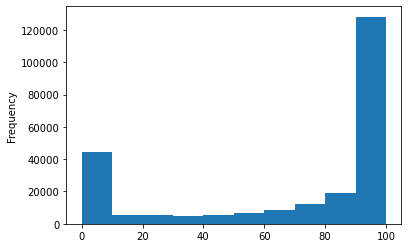

In [189]:
coverage["Gigabit availability (% premises)"].plot(kind="hist");
#coverage["Gigabit availability (% premises)"].hist();

We can also interrogate columns for unique values and missing values.

In [190]:
# unique variables
lookup["rgn22nm"].unique()

array(['London', 'North West', 'Yorkshire and The Humber', 'North East',
       'West Midlands', 'East Midlands', 'South West', 'East of England',
       'South East', 'Wales'], dtype=object)

In [191]:
# number of unique variables in a given column
lookup["rgn22nm"].nunique()

10

In [192]:
# total missing values
lookup["rgn22nmw"].isna().sum()

0

### **Basic feature engineering**

As part of our work, we might like to look at the prevalence of properties - by output area - with the option of the fastest broadband speeds. We can use binning to create new variables. Two approaches might be useful here:    
- `pd.cut` divides values into bins of broadly equal range (or user-defined)   
- `pd.qcut` divides values into bins with broadly equal values assigned

In [193]:
# 5 bins of equal range
coverage["fast_bin_pct_prems"] = pd.cut(coverage["% of premises with >=300Mbit/s download speed"], bins=5)
coverage["fast_bin_pct_prems"].value_counts()

(80.0, 100.0]    151027
(-0.1, 20.0]      45428
(60.0, 80.0]      20133
(40.0, 60.0]      12083
(20.0, 40.0]      10706
Name: fast_bin_pct_prems, dtype: int64

Perhaps we also want to comment on where output areas sit in terms of numbers of premises with the option of gigabit connection.

In [194]:
# we can also specify the bin ranges but note the 0 behaviour
coverage["gig_bin_prems"] = pd.cut(coverage["Number of premises with Gigabit availability"], bins=coverage["Number of premises with Gigabit availability"].quantile(q=[0,0.25,0.5,0.75,1]))
coverage["gig_bin_prems"].value_counts().sort_index()

(0.0, 37.0]        23835
(37.0, 102.0]      59662
(102.0, 129.0]     60640
(129.0, 1633.0]    58926
Name: gig_bin_prems, dtype: int64

In [195]:
# and `qcut` distributes bin allocation equally
coverage["gig_qbin_prems"] = pd.qcut(coverage["Number of premises with Gigabit availability"], q=4, labels=["First quartile", "Second quartile", "Third quartile", "Fourth quartile"])
coverage["gig_qbin_prems"].value_counts().sort_index()

First quartile     60149
Second quartile    59662
Third quartile     60640
Fourth quartile    58926
Name: gig_qbin_prems, dtype: int64

In [196]:
# inspecting our new features
coverage[["% of premises with >=300Mbit/s download speed",
          "fast_bin_pct_prems",
          "Number of premises with Gigabit availability",
          "gig_bin_prems",
          "gig_qbin_prems"]]

,% of premises with >=300Mbit/s download speed,fast_bin_pct_prems,Number of premises with Gigabit availability,gig_bin_prems,gig_qbin_prems
0,100.0,"(80.0, 100.0]",116,"(102.0, 129.0]",Third quartile
1,93.6,"(80.0, 100.0]",117,"(102.0, 129.0]",Third quartile
2,98.7,"(80.0, 100.0]",75,"(37.0, 102.0]",Second quartile
3,0.0,"(-0.1, 20.0]",0,NaN,First quartile
4,100.0,"(80.0, 100.0]",146,"(129.0, 1633.0]",Fourth quartile
...,...,...,...,...,...
239372,8.8,"(-0.1, 20.0]",0,NaN,First quartile
239373,97.0,"(80.0, 100.0]",160,"(129.0, 1633.0]",Fourth quartile
239374,96.5,"(80.0, 100.0]",82,"(37.0, 102.0]",Second quartile
239375,100.0,"(80.0, 100.0]",101,"(37.0, 102.0]",Second quartile


Again, the focus of this session is not visualisation but `matplotlib` makes it easy for us to view the difference in bin allocation.

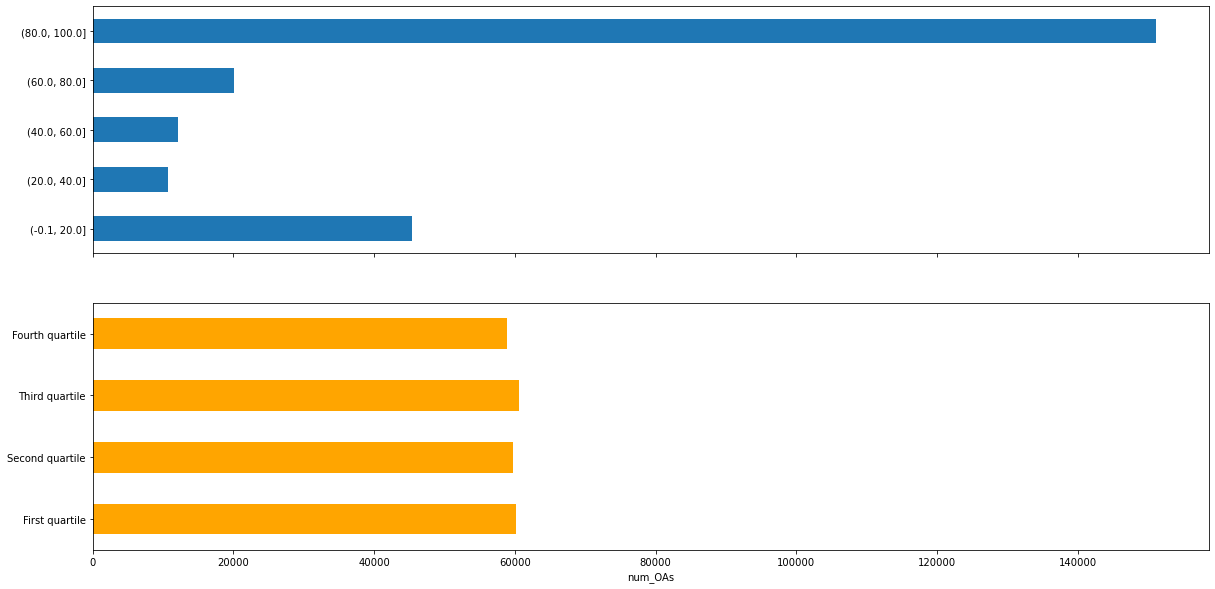

In [197]:
plt.subplots(nrows=2, figsize=(20,10))
ax1 = plt.subplot(2,1,1)
coverage["fast_bin_pct_prems"].value_counts().sort_index().plot(kind="barh", xlabel="num_OAs")
ax2 = plt.subplot(2,1,2, sharex=ax1)
coverage["gig_qbin_prems"].value_counts().sort_index().plot(kind="barh", xlabel="num_OAs", color="orange");

### Data manipulation

We can filter our data in a number of ways. In the following examples, we will filter by specific conditions both directly and by defining a mask (i.e. binary labelling of each row in terms of it meeting specified condition(s).)

In [198]:
# comparison operators can be used to define a condition
mask = popest["All Ages"]>=400      # ==, !=, >, >=, <, <=
mask.head(10)

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
Name: All Ages, dtype: bool

In [199]:
# direct filtering by condition
popest[popest["All Ages"]>=400]
#popest[mask]     # filtering using the mask defined earlier

,OA11CD,LSOA11CD,All Ages,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90+
4,E00041386,E01008162,605,11,5,5,7,10,9,7,6,4,1,2,2,0,4,2,1,4,1,2,2,5,11,27,25,19,27,33,23,33,31,30,30,31,24,26,15,12,14,12,8,11,7,7,9,4,4,4,1,4,3,0,3,2,3,2,1,0,0,1,1,3,4,1,0,2,0,2,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,E00166172,E01008162,427,3,9,1,4,0,7,4,3,2,1,3,4,3,3,2,0,2,1,0,0,7,8,5,14,22,26,18,29,8,26,16,9,23,12,19,9,12,11,4,6,12,10,6,3,2,8,4,6,1,1,4,2,2,1,0,0,1,2,7,1,1,3,0,2,1,1,0,2,1,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,0
8,E00166187,E01008162,417,5,5,2,3,5,4,2,10,6,5,5,4,0,4,2,3,3,2,1,2,4,5,8,12,27,16,17,30,16,13,7,14,16,16,16,2,8,7,3,8,9,9,9,8,5,5,2,4,2,7,7,1,3,3,4,0,1,3,3,0,1,0,1,1,1,2,2,2,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,E00041364,E01008163,518,10,15,8,7,14,9,14,10,9,10,11,11,9,5,12,10,17,21,23,18,10,10,9,5,9,2,8,9,9,8,6,7,6,8,6,9,5,6,3,4,6,4,1,4,3,8,7,7,11,2,1,6,4,3,4,1,6,2,3,4,2,5,6,5,4,1,3,4,2,0,2,3,0,1,2,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,2
14,E00166182,E01008163,659,14,14,18,19,14,20,25,20,15,28,20,26,23,23,27,30,23,27,18,18,9,8,9,5,6,8,5,4,3,5,6,5,6,1,6,2,7,8,6,9,10,7,9,8,5,8,6,4,5,2,2,2,4,0,4,3,2,2,2,4,4,2,2,5,1,2,1,0,3,1,2,0,0,0,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8776,E00176361,E01033714,451,4,2,8,2,6,5,3,6,8,5,8,9,10,4,8,1,4,3,4,4,2,2,4,1,7,0,1,5,2,1,2,4,4,2,2,3,8,1,3,5,5,4,7,7,7,5,6,7,10,11,6,3,1,8,5,6,4,4,1,2,6,6,8,4,6,10,9,9,5,10,12,5,9,10,5,7,2,7,5,5,3,3,3,7,2,1,4,6,4,0,6
8782,E00140212,E01033716,435,3,10,5,8,9,9,16,18,10,10,7,10,11,8,7,13,7,13,6,7,1,6,9,7,4,5,3,4,6,7,3,8,5,6,5,7,5,7,5,10,6,5,6,6,9,5,6,0,4,8,3,7,9,3,4,0,0,8,1,1,3,1,1,3,5,1,4,0,3,3,3,1,3,1,2,0,2,0,2,0,0,0,0,0,1,0,3,0,1,0,1
8792,E00139207,E01033717,429,5,2,1,1,0,4,0,5,3,3,4,2,9,5,3,4,4,0,8,5,2,3,1,1,0,3,4,1,1,2,3,5,5,6,4,2,3,3,6,3,7,1,2,6,5,5,6,7,0,8,2,9,13,4,1,11,3,6,7,7,11,10,7,5,10,7,5,8,9,6,8,10,8,17,7,6,7,4,3,4,5,0,0,0,3,0,4,4,4,4,17
8793,E00139208,E01033717,466,3,3,4,3,2,5,2,3,7,2,4,4,4,4,9,9,4,4,7,3,2,7,4,1,3,2,3,2,2,5,6,4,7,3,1,6,3,2,4,3,8,7,5,11,7,4,5,9,6,6,13,14,13,9,13,9,6,9,5,11,4,6,8,10,8,5,8,5,4,7,6,9,5,6,4,6,2,12,4,4,2,3,3,3,2,0,2,0,0,0,2


We can also filter on a slice:

In [200]:
popest.loc[:, "OA11CD"][mask]

4       E00041386
5       E00166172
8       E00166187
11      E00041364
14      E00166182
          ...    
8776    E00176361
8782    E00140212
8792    E00139207
8793    E00139208
8799    E00139747
Name: OA11CD, Length: 843, dtype: object

### Multiple condition filtering

We might want to investigate all output areas in Wales with less than 20% of premises with a gigabit option.   
We can filter a dataframe by multiple conditions where each condition is encapsulated within () and divided by   
- **&** (and)  
- **|** (or)

In [201]:
# as before, binary label for each row
mask = (coverage["Gigabit availability (% premises)"]<20) & (coverage["output_area"].str[0]=="W")
mask.value_counts()

False    235587
True       3790
dtype: int64

In [202]:
# viewing the rows meeting the conditions directly
coverage[(coverage["Gigabit availability (% premises)"]<20) & (coverage["output_area"].str[0]=="W")]
#coverage[mask]

,output_area,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),% of premises unable to receive 2Mbit/s,% of premises unable to receive 5Mbit/s,% of premises unable to receive 10Mbit/s,% of premises unable to receive 30Mbit/s,Gigabit availability (% premises),% of premises below the USO,% of premises with NGA,% of premises able to receive decent broadband from FWA,Number of premises with SFBB availability,Number of premises with UFBB (100Mbit/s) availability,Number of premises with UFBB availability,Number of premises unable to receive 2Mbit/s,Number of premises unable to receive 5Mbit/s,Number of premises unable to receive 10Mbit/s,Number of premises unable to receive 30Mbit/s,Number of premises with Gigabit availability,Number of premises below the USO,Number of premises with NGA,Number of premises able to receive decent broadband from FWA,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed,fast_bin_pct_prems,gig_bin_prems,gig_qbin_prems
229104,W00000001,191,190,39.8,0.0,0.0,6.3,22.0,34.0,59.7,0.0,8.9,99.5,0.0,76,0,0,12,42,65,114,0,17,190,0,39.8,0.0,6.3,15.7,12.0,25.7,76,0,12,30,23,49,"(-0.1, 20.0]",NaN,First quartile
229105,W00000002,154,154,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,154,0,0,0,0,0,0,0,0,154,0,100.0,0.0,0.0,0.0,0.0,0.0,154,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
229107,W00000004,206,204,85.4,16.5,16.5,9.2,9.2,10.2,13.6,16.5,1.0,99.0,0.0,176,34,34,19,19,21,28,34,2,204,0,68.9,16.5,9.2,0.0,1.0,3.4,142,34,19,0,2,7,"(-0.1, 20.0]","(0.0, 37.0]",First quartile
229108,W00000005,226,226,96.5,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,100.0,0.0,218,0,0,0,0,0,8,0,0,226,0,96.5,0.0,0.0,0.0,0.0,3.5,218,0,0,0,0,8,"(-0.1, 20.0]",NaN,First quartile
229109,W00000006,173,173,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,173,0,0,0,0,0,0,0,0,173,0,100.0,0.0,0.0,0.0,0.0,0.0,173,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239362,W00010683,125,125,89.6,16.8,16.8,0.0,0.0,1.6,10.4,16.8,0.0,99.2,0.0,112,21,21,0,0,2,13,21,0,124,0,72.8,16.8,0.0,0.0,1.6,8.8,91,21,0,0,2,11,"(-0.1, 20.0]","(0.0, 37.0]",First quartile
239363,W00010684,158,158,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,158,0,0,0,0,0,0,0,0,158,0,100.0,0.0,0.0,0.0,0.0,0.0,158,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
239366,W00010687,143,143,93.7,18.2,18.2,0.0,0.0,4.9,6.3,18.2,0.0,93.7,0.0,134,26,26,0,0,7,9,26,0,134,0,75.5,18.2,0.0,0.0,4.9,1.4,108,26,0,0,7,2,"(-0.1, 20.0]","(0.0, 37.0]",First quartile
239369,W00010690,149,149,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,149,0,0,0,0,0,0,0,0,149,0,100.0,0.0,0.0,0.0,0.0,0.0,149,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile


If we wanted to repeat this for all output areas in North East England, we can filter these codes using the `.isin()` method.

In [203]:
# create a list of OAs in North East and North West England
reqd_oas = lookup["oa21cd"][lookup["rgn22nm"].isin(["North East"])].tolist()

# define conditions, including one as being in the above list
low_gig_north_england = coverage[(coverage["Gigabit availability (% premises)"]<20) & (coverage["output_area"].isin(reqd_oas))]
low_gig_north_england

,output_area,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),% of premises unable to receive 2Mbit/s,% of premises unable to receive 5Mbit/s,% of premises unable to receive 10Mbit/s,% of premises unable to receive 30Mbit/s,Gigabit availability (% premises),% of premises below the USO,% of premises with NGA,% of premises able to receive decent broadband from FWA,Number of premises with SFBB availability,Number of premises with UFBB (100Mbit/s) availability,Number of premises with UFBB availability,Number of premises unable to receive 2Mbit/s,Number of premises unable to receive 5Mbit/s,Number of premises unable to receive 10Mbit/s,Number of premises unable to receive 30Mbit/s,Number of premises with Gigabit availability,Number of premises below the USO,Number of premises with NGA,Number of premises able to receive decent broadband from FWA,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed,fast_bin_pct_prems,gig_bin_prems,gig_qbin_prems
38932,E00041394,145,144,99.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.3,0.0,144,0,0,0,0,0,0,0,0,144,0,99.3,0.0,0.0,0.0,0.0,0.0,144,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
38935,E00041399,159,159,100.0,96.9,84.9,0.0,0.0,0.0,0.0,19.5,0.0,100.0,0.0,159,154,135,0,0,0,0,31,0,159,0,15.1,84.9,0.0,0.0,0.0,0.0,24,135,0,0,0,0,"(80.0, 100.0]","(0.0, 37.0]",First quartile
38945,E00041410,148,148,100.0,100.0,46.6,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,148,148,69,0,0,0,0,0,0,148,0,53.4,46.6,0.0,0.0,0.0,0.0,79,69,0,0,0,0,"(40.0, 60.0]",NaN,First quartile
38946,E00041411,91,91,100.0,53.8,4.4,0.0,0.0,0.0,0.0,3.3,0.0,100.0,0.0,91,49,4,0,0,0,0,3,0,91,0,95.6,4.4,0.0,0.0,0.0,0.0,87,4,0,0,0,0,"(-0.1, 20.0]","(0.0, 37.0]",First quartile
38947,E00041413,108,108,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,108,0,0,0,0,0,0,0,0,108,0,100.0,0.0,0.0,0.0,0.0,0.0,108,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178078,E00190131,173,173,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,173,0,0,0,0,0,0,0,0,173,0,100.0,0.0,0.0,0.0,0.0,0.0,173,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
178082,E00190135,44,44,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,44,0,0,0,0,0,0,0,0,44,0,100.0,0.0,0.0,0.0,0.0,0.0,44,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
178083,E00190136,113,113,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,113,0,0,0,0,0,0,0,0,113,0,100.0,0.0,0.0,0.0,0.0,0.0,113,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
178087,E00190140,136,136,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,136,0,0,0,0,0,0,0,0,136,0,100.0,0.0,0.0,0.0,0.0,0.0,136,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile


Next we might want to check that the superfast availability is adequate even though the above areas have fairly poor gigabit coverage. We can use the `sort_values()` method to present the output areas in order.

In [204]:
low_gig_north_england.sort_values("SFBB availability (% premises)")     # ascending order is default

,output_area,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),% of premises unable to receive 2Mbit/s,% of premises unable to receive 5Mbit/s,% of premises unable to receive 10Mbit/s,% of premises unable to receive 30Mbit/s,Gigabit availability (% premises),% of premises below the USO,% of premises with NGA,% of premises able to receive decent broadband from FWA,Number of premises with SFBB availability,Number of premises with UFBB (100Mbit/s) availability,Number of premises with UFBB availability,Number of premises unable to receive 2Mbit/s,Number of premises unable to receive 5Mbit/s,Number of premises unable to receive 10Mbit/s,Number of premises unable to receive 30Mbit/s,Number of premises with Gigabit availability,Number of premises below the USO,Number of premises with NGA,Number of premises able to receive decent broadband from FWA,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed,fast_bin_pct_prems,gig_bin_prems,gig_qbin_prems
171210,E00183244,125,125,0.0,0.0,0.0,0.0,0.0,5.6,100.0,0.0,0.0,100.0,0.0,0,0,0,0,0,7,125,0,0,125,0,0.0,0.0,0.0,0.0,5.6,94.4,0,0,0,0,7,118,"(-0.1, 20.0]",NaN,First quartile
132594,E00139991,64,61,0.0,0.0,0.0,62.5,79.7,93.8,95.3,0.0,43.8,92.2,0.0,0,0,0,40,51,60,61,0,28,59,0,0.0,0.0,62.5,17.2,14.1,1.6,0,0,40,11,9,1,"(-0.1, 20.0]",NaN,First quartile
58623,E00062212,107,107,0.0,0.0,0.0,75.7,83.2,84.1,100.0,0.0,3.7,100.0,41.1,0,0,0,81,89,90,107,0,4,107,44,0.0,0.0,75.7,7.5,0.9,15.9,0,0,81,8,1,17,"(-0.1, 20.0]",NaN,First quartile
100011,E00105700,92,92,0.0,0.0,0.0,21.7,87.0,92.4,100.0,0.0,3.3,100.0,3.3,0,0,0,20,80,85,92,0,3,92,3,0.0,0.0,21.7,65.2,5.4,7.6,0,0,20,60,5,7,"(-0.1, 20.0]",NaN,First quartile
100153,E00105848,71,67,0.0,0.0,0.0,57.7,59.2,64.8,94.4,0.0,33.8,0.0,0.0,0,0,0,41,42,46,67,0,24,0,0,0.0,0.0,57.7,1.4,5.6,29.6,0,0,41,1,4,21,"(-0.1, 20.0]",NaN,First quartile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100293,E00105991,138,138,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,138,0,0,0,0,0,0,0,0,138,0,100.0,0.0,0.0,0.0,0.0,0.0,138,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
100292,E00105990,190,190,100.0,1.1,1.1,0.0,0.0,0.0,0.0,1.1,0.0,100.0,0.0,190,2,2,0,0,0,0,2,0,190,0,98.9,1.1,0.0,0.0,0.0,0.0,188,2,0,0,0,0,"(-0.1, 20.0]","(0.0, 37.0]",First quartile
100291,E00105989,148,148,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,10.1,148,0,0,0,0,0,0,0,0,148,15,100.0,0.0,0.0,0.0,0.0,0.0,148,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile
40362,E00042914,116,116,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,116,0,0,0,0,0,0,0,0,116,0,100.0,0.0,0.0,0.0,0.0,0.0,116,0,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile


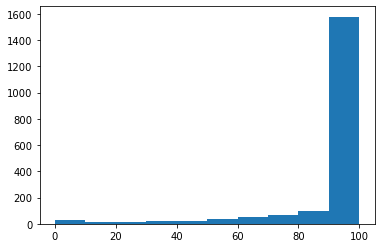

In [205]:
low_gig_north_england["SFBB availability (% premises)"].hist(grid=False);

We might be interested in unpicking the age demographic in the output areas above with 25% superfast coverage or lower. Again, we will want to create a list of these affected OAs.

In our example, we will look at the prevalence of younger children. First of all, we create an aggregate a new feature to capture all ages from 0 to 11 in our `popest` dataframe.

In [206]:
# popest.columns = popest.columns.astype("str")
popest["11_or_under"] = popest.loc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].sum(axis=1)
popest.head()

,OA11CD,LSOA11CD,All Ages,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90+,11_or_under
0,E00041378,E01008162,301,1,2,3,1,1,0,4,2,4,1,0,1,1,1,3,1,1,3,1,0,2,3,7,4,9,10,18,4,14,6,8,5,4,5,2,4,2,3,5,3,2,1,3,2,5,3,6,3,4,3,4,5,10,10,1,5,3,5,6,6,7,5,2,5,1,4,3,2,1,1,4,6,3,2,3,1,1,1,2,0,2,1,3,2,2,0,1,0,0,0,0,20
1,E00041381,E01008162,259,4,2,0,0,3,4,5,0,0,3,1,2,1,0,4,0,1,0,4,1,7,1,3,6,3,3,2,5,7,10,6,6,4,2,6,3,2,2,4,3,3,6,4,2,3,2,4,4,3,4,8,2,0,4,6,2,3,8,6,2,3,1,6,3,3,2,6,2,2,3,7,5,3,2,6,1,1,0,0,1,2,0,2,1,0,0,0,0,1,0,0,24
2,E00041382,E01008162,176,1,2,0,3,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,3,0,0,6,8,3,0,1,4,9,3,1,3,6,4,4,5,1,4,4,4,2,3,0,2,2,3,0,2,3,1,7,2,4,3,2,4,1,3,5,2,2,5,1,2,1,0,3,2,1,3,0,1,2,2,2,1,2,2,1,1,0,1,0,2,4,0,0,1,0,0,7
3,E00041383,E01008162,301,3,3,1,3,1,2,2,2,4,2,2,2,3,6,3,0,3,2,1,1,1,5,7,7,13,10,3,9,7,6,2,1,5,5,9,5,7,3,2,6,8,2,1,6,5,3,1,4,7,1,4,5,2,5,2,4,2,8,4,2,7,3,2,1,2,2,3,3,2,2,3,2,4,7,3,3,4,2,1,0,2,2,0,1,0,1,1,1,0,0,2,27
4,E00041386,E01008162,605,11,5,5,7,10,9,7,6,4,1,2,2,0,4,2,1,4,1,2,2,5,11,27,25,19,27,33,23,33,31,30,30,31,24,26,15,12,14,12,8,11,7,7,9,4,4,4,1,4,3,0,3,2,3,2,1,0,0,1,1,3,4,1,0,2,0,2,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,69


In [207]:
vuln_oas = low_gig_north_england["output_area"][low_gig_north_england["SFBB availability (% premises)"]<=25].tolist()

# preview the first 10 items in the list
vuln_oas[0:10]

['E00041556',
 'E00041560',
 'E00041708',
 'E00042134',
 'E00042579',
 'E00042583',
 'E00042625',
 'E00043806',
 'E00060311',
 'E00061183']

We arrive at a filtered view of our original dataframe - North East England OAs with <20% gigabit and <=25% superfast - ordered by numbers of primary-age pupils.

In [208]:
# filtering and sorting
ordered_popest = popest[["OA11CD", "LSOA11CD", "All Ages", "11_or_under"]][popest["OA11CD"].isin(vuln_oas)].sort_values("11_or_under", ascending=False)
ordered_popest.head(10)

,OA11CD,LSOA11CD,All Ages,11_or_under
794,E00042134,E01008304,391,66
6092,E00104856,E01020664,573,59
7333,E00106108,E01020906,380,44
7209,E00105999,E01020882,228,42
8159,E00139994,E01027506,296,39
6904,E00105700,E01020828,300,35
5816,E00104587,E01020615,211,32
5759,E00104525,E01020604,268,31
8181,E00140023,E01027511,278,30
3732,E00060311,E01011959,304,28


In [209]:
ordered_popest["pct_11_or_under"] = ordered_popest["11_or_under"]/ordered_popest["All Ages"]*100
ordered_popest.sort_values("pct_11_or_under", ascending=False).head(10)

,OA11CD,LSOA11CD,All Ages,11_or_under,pct_11_or_under
7209,E00105999,E01020882,228,42,18.421053
794,E00042134,E01008304,391,66,16.879795
5816,E00104587,E01020615,211,32,15.165877
2438,E00043806,E01008629,117,16,13.675214
8580,E00105586,E01033203,149,20,13.422819
8159,E00139994,E01027506,296,39,13.175676
8156,E00139991,E01027506,152,18,11.842105
7120,E00105902,E01020866,127,15,11.811024
6904,E00105700,E01020828,300,35,11.666667
7333,E00106108,E01020906,380,44,11.578947


Alternatively, we might want to list ALL the output areas by population estimate and by LSOA in turn:

In [210]:
# note lists to provide parameters for multiple columns
popest.iloc[:, :3].sort_values(["LSOA11CD", "All Ages"], ascending=[True, False]).head(20)

,OA11CD,LSOA11CD,All Ages
4,E00041386,E01008162,605
5,E00166172,E01008162,427
8,E00166187,E01008162,417
0,E00041378,E01008162,301
3,E00041383,E01008162,301
1,E00041381,E01008162,259
2,E00041382,E01008162,176
9,E00166188,E01008162,170
7,E00166175,E01008162,146
6,E00166174,E01008162,80


Let's return to our UK broadband coverage data. We can use the `.map()` method apply a dictionary to an existing column to generate values in a new column. Here, let's take the initial (country) letter for each output area to create a column of country labels.

In [211]:
coverage["country"] = coverage["output_area"].str[0].map({"E": "England",
                                                          "W": "Wales",
                                                          "S": "Scotland",
                                                          "N": "Northern Ireland"})

# this 'random' sample demonstrates the effect of the `.map()` method
coverage[["output_area", "country"]].sample(5, random_state=9)

,output_area,country
143381,E00151364,England
161322,E00171158,England
225003,S00131195,Scotland
230714,W00001644,Wales
142020,E00149936,England


In [212]:
# columns can be renamed
coverage.rename(columns={"country": "uk_country"}, inplace=True)

# values can be replaced
coverage["uk_country"].replace("Northern Ireland", "N Ireland", inplace=True)

coverage["uk_country"].unique()

array(['England', 'N Ireland', 'Scotland', 'Wales'], dtype=object)

We can check that all 4 countries have been captured correctly:

In [213]:
coverage["uk_country"].value_counts()
#coverage["output_area"].str[0].value_counts()

England      178541
Scotland      46026
Wales         10273
N Ireland      4537
Name: uk_country, dtype: int64

### **Deleting columns**

Deleting columns should only be done if absolutely necessary. However, particularly for larger datasets, it can be a useful way of freeing up memory. The following examples are provided for illustration only.

For this example, we decide that Next Generation Access (NGA) variables are no longer required. We will use the `.filter()` method to identify columns with the *NGA* acronym.

In [214]:
coverage.filter(like="NGA").head(2)

,% of premises with NGA,Number of premises with NGA
0,100.0,116
1,100.0,125


In [215]:
# using 'del' in Python 3
del coverage["% of premises with NGA"]      # permanent!
coverage.filter(like="NGA").head(2)

,Number of premises with NGA
0,116
1,125


In [216]:
# using the `.drop()` method
coverage.drop(columns=["Number of premises with NGA"], inplace=True)
coverage.filter(like="NGA").head(2)

""
0
1


### **Joining dataframes**  
**Note:** In this illustration, we are joining two dataframes with different output area codes (one Census 2011, the other Census 2021). Only those output area codes to feature in both dataframes will be included in an inner join. Consequently, we are using a left join in this illustration to ensure that all existing population estimates are retained, irrespective of output area code changes.

In [217]:
# how many rows in each dataframe
len(coverage), len(lookup)

(239377, 188880)

In [218]:
cov_incl_region = pd.merge(coverage, lookup, left_on="output_area", right_on="oa21cd", how="left")
cir = cov_incl_region.copy()      # for use later on
cov_incl_region

,output_area,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),% of premises unable to receive 2Mbit/s,% of premises unable to receive 5Mbit/s,% of premises unable to receive 10Mbit/s,% of premises unable to receive 30Mbit/s,Gigabit availability (% premises),% of premises below the USO,% of premises able to receive decent broadband from FWA,Number of premises with SFBB availability,Number of premises with UFBB (100Mbit/s) availability,Number of premises with UFBB availability,Number of premises unable to receive 2Mbit/s,Number of premises unable to receive 5Mbit/s,Number of premises unable to receive 10Mbit/s,Number of premises unable to receive 30Mbit/s,Number of premises with Gigabit availability,Number of premises below the USO,Number of premises able to receive decent broadband from FWA,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed,fast_bin_pct_prems,gig_bin_prems,gig_qbin_prems,uk_country,oa21cd,rgn22cd,rgn22nm,rgn22nmw
0,E00000001,116,116,100.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,116,116,116,0,0,0,0,116,0,0,0.0,100.0,0.0,0.0,0.0,0.0,0,116,0,0,0,0,"(80.0, 100.0]","(102.0, 129.0]",Third quartile,England,E00000001,E12000007,London,Llundain
1,E00000003,125,125,100.0,93.6,93.6,0.0,0.0,0.0,0.0,93.6,0.0,0.0,125,117,117,0,0,0,0,117,0,0,6.4,93.6,0.0,0.0,0.0,0.0,8,117,0,0,0,0,"(80.0, 100.0]","(102.0, 129.0]",Third quartile,England,E00000003,E12000007,London,Llundain
2,E00000005,76,76,98.7,98.7,98.7,0.0,0.0,0.0,1.3,98.7,0.0,0.0,75,75,75,0,0,0,1,75,0,0,0.0,98.7,0.0,0.0,0.0,1.3,0,75,0,0,0,1,"(80.0, 100.0]","(37.0, 102.0]",Second quartile,England,E00000005,E12000007,London,Llundain
3,E00000007,103,103,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0,0,0,0,0,0,103,0,0,0,0.0,0.0,0.0,0.0,0.0,100.0,0,0,0,0,0,103,"(-0.1, 20.0]",NaN,First quartile,England,E00000007,E12000007,London,Llundain
4,E00000010,146,146,100.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,146,146,146,0,0,0,0,146,0,0,0.0,100.0,0.0,0.0,0.0,0.0,0,146,0,0,0,0,"(80.0, 100.0]","(129.0, 1633.0]",Fourth quartile,England,E00000010,E12000007,London,Llundain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239372,W00010693,68,68,100.0,33.8,8.8,0.0,0.0,0.0,0.0,0.0,0.0,5.9,68,23,6,0,0,0,0,0,0,4,91.2,8.8,0.0,0.0,0.0,0.0,62,6,0,0,0,0,"(-0.1, 20.0]",NaN,First quartile,Wales,W00010693,W92000004,Wales,Cymru
239373,W00010694,165,165,100.0,97.0,97.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,165,160,160,0,0,0,0,160,0,0,3.0,97.0,0.0,0.0,0.0,0.0,5,160,0,0,0,0,"(80.0, 100.0]","(129.0, 1633.0]",Fourth quartile,Wales,W00010694,W92000004,Wales,Cymru
239374,W00010695,85,85,100.0,96.5,96.5,0.0,0.0,0.0,0.0,96.5,0.0,0.0,85,82,82,0,0,0,0,82,0,0,3.5,96.5,0.0,0.0,0.0,0.0,3,82,0,0,0,0,"(80.0, 100.0]","(37.0, 102.0]",Second quartile,Wales,W00010695,W92000004,Wales,Cymru
239375,W00010696,101,101,100.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,101,101,101,0,0,0,0,101,0,0,0.0,100.0,0.0,0.0,0.0,0.0,0,101,0,0,0,0,"(80.0, 100.0]","(37.0, 102.0]",Second quartile,Wales,W00010696,W92000004,Wales,Cymru


In [219]:
df = cov_incl_region.merge(popest, left_on="output_area", right_on="OA11CD", how="inner")     # inner join as we are only working with North-East England population estimates
df[0:3]

,output_area,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),% of premises unable to receive 2Mbit/s,% of premises unable to receive 5Mbit/s,% of premises unable to receive 10Mbit/s,% of premises unable to receive 30Mbit/s,Gigabit availability (% premises),% of premises below the USO,% of premises able to receive decent broadband from FWA,Number of premises with SFBB availability,Number of premises with UFBB (100Mbit/s) availability,Number of premises with UFBB availability,Number of premises unable to receive 2Mbit/s,Number of premises unable to receive 5Mbit/s,Number of premises unable to receive 10Mbit/s,Number of premises unable to receive 30Mbit/s,Number of premises with Gigabit availability,Number of premises below the USO,Number of premises able to receive decent broadband from FWA,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed,Number of premises with 30<300Mbit/s download speed,Number of premises with >=300Mbit/s download speed,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed,fast_bin_pct_prems,gig_bin_prems,gig_qbin_prems,uk_country,oa21cd,rgn22cd,rgn22nm,rgn22nmw,OA11CD,LSOA11CD,All Ages,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90+,11_or_under
0,E00041363,110,110,100.0,98.2,91.8,0.0,0.0,0.0,0.0,87.3,0.0,0.0,110,108,101,0,0,0,0,96,0,0,8.2,91.8,0.0,0.0,0.0,0.0,9,101,0,0,0,0,"(80.0, 100.0]","(37.0, 102.0]",Second quartile,England,E00041363,E12000001,North East,Gogledd-ddwyrain Lloegr,E00041363,E01008163,178,2,1,3,0,1,1,0,1,0,0,1,0,1,0,0,0,1,4,1,2,1,0,1,1,4,5,5,4,2,3,1,2,4,2,4,1,1,1,2,2,3,2,1,1,0,2,2,1,2,2,0,2,4,4,1,0,2,2,2,3,8,2,1,1,2,5,2,4,1,5,7,3,2,3,3,0,1,7,3,4,4,3,1,2,1,0,0,0,0,0,2,10
1,E00041364,143,143,100.0,99.3,99.3,0.0,0.0,0.0,0.0,99.3,0.0,0.0,143,142,142,0,0,0,0,142,0,0,0.7,99.3,0.0,0.0,0.0,0.0,1,142,0,0,0,0,"(80.0, 100.0]","(129.0, 1633.0]",Fourth quartile,England,E00041364,E12000001,North East,Gogledd-ddwyrain Lloegr,E00041364,E01008163,518,10,15,8,7,14,9,14,10,9,10,11,11,9,5,12,10,17,21,23,18,10,10,9,5,9,2,8,9,9,8,6,7,6,8,6,9,5,6,3,4,6,4,1,4,3,8,7,7,11,2,1,6,4,3,4,1,6,2,3,4,2,5,6,5,4,1,3,4,2,0,2,3,0,1,2,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,2,128
2,E00041366,134,134,100.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,134,134,134,0,0,0,0,134,0,0,0.0,100.0,0.0,0.0,0.0,0.0,0,134,0,0,0,0,"(80.0, 100.0]","(129.0, 1633.0]",Fourth quartile,England,E00041366,E12000001,North East,Gogledd-ddwyrain Lloegr,E00041366,E01008164,247,3,6,1,3,0,2,1,1,3,1,0,1,3,1,3,1,0,0,0,0,1,4,3,6,11,8,6,12,3,11,10,9,8,9,3,5,4,7,5,6,2,7,2,2,4,4,5,4,4,1,2,0,2,1,4,3,3,1,2,3,0,4,2,1,3,2,1,3,1,2,1,2,1,0,2,2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,22


There are many methods available in Python to achieve the same (or similar) results. You will want to explore these:   
- `pd.merge`   
- `pd.concat`   
- `pd.join`   
- `pd.append`

We'll save this dataframe using the `pd.to_csv` method.

In [220]:
df.to_csv("outputs/broadband_neengland_combined.csv")

### **Aggregations using the `.groupby()` method**

The `.groupby()` method allows us to slice a dataframe by any number of columns and aggregate the values in terms of any number of other columns.

So - in this first example, we aggregate the maximum % of premises unable to receive 2Mbit/s download speeds in each LSOA.

In [221]:
df.groupby(["LSOA11CD"])["% of premises unable to receive 2Mbit/s"].agg("max").sort_values(ascending=False).head(10)

LSOA11CD
E01012334    100.0
E01020863     65.9
E01011959     65.8
E01027506     62.5
E01020864     61.2
E01020637     57.9
E01027511     56.1
E01020862     51.3
E01027368     40.4
E01027505     39.8
Name: % of premises unable to receive 2Mbit/s, dtype: float64

You can often leave out the `.agg()` method to achieve the same result.

In [222]:
cov_incl_region.groupby(["rgn22nm"])["output_area"].count()

rgn22nm
East Midlands               15388
East of England             19967
London                      26340
North East                   9100
North West                  24042
South East                  28965
South West                  18425
Wales                       10273
West Midlands               18579
Yorkshire and The Humber    17735
Name: output_area, dtype: int64

Or the slice and aggregations can be defined in the form of a dictionary passed to the `.agg()` method.

In [223]:
# look at all the chained methods!
df.groupby("LSOA11CD").agg({"Number of premises unable to receive 2Mbit/s": np.max,
                            "Number of premises with >=300Mbit/s download speed":"median"}).sort_values("Number of premises unable to receive 2Mbit/s", ascending=False).reset_index().head(10)

,LSOA11CD,Number of premises unable to receive 2Mbit/s,Number of premises with >=300Mbit/s download speed
0,E01011959,98,25.0
1,E01012334,81,2.0
2,E01027511,60,8.0
3,E01027505,51,13.5
4,E01027506,51,0.0
5,E01027472,45,6.0
6,E01020863,41,0.5
7,E01020862,39,0.0
8,E01020906,38,0.0
9,E01027512,34,0.0


### **A few other things worth knowing**

The `.copy()` method is useful for creating an independent copy of a dataframe. Without this, you create a view which meaning both will update concurrently.

In [224]:
copy_df = cir.copy()     # this creates an INDEPENDENT copy
copy_df["rgn22nm"].replace({"North East": "NE England"}, inplace=True)
copy_count = len(copy_df[copy_df["rgn22nm"]=="NE England"])
orig_count = len(cir[cir["rgn22nm"]=="NE England"])
print(f"In the copy: {copy_count} rows matching")
print(f"In the original: {orig_count} rows matching")

In the copy: 9100 rows matching
In the original: 0 rows matching


In [225]:
copy_df = cir      # this creates a DEPENDENT view
copy_df["rgn22nm"].replace({"North East": "NE England"}, inplace=True)
copy_count = len(copy_df[copy_df["rgn22nm"]=="NE England"])
orig_count = len(cir[cir["rgn22nm"]=="NE England"])
print(f"In the copy: {copy_count} rows matching")
print(f"In the original: {orig_count} rows matching")

In the copy: 9100 rows matching
In the original: 9100 rows matching


This is so critical that `pandas` will return a Copy Warning recommending the use of the `.loc()` method instead:

In [226]:
cov_incl_region.loc[cov_incl_region["rgn22nm"]=="North West", "rgn22nm"] = "NW England"
cov_incl_region.loc[cov_incl_region["rgn22nm"]=="North East", "rgn22nm"] = "NE England"
cov_incl_region["rgn22nm"].unique()

array(['London', 'NW England', 'Yorkshire and The Humber', 'NE England',
       'West Midlands', 'East Midlands', 'South West', 'East of England',
       'South East', nan, 'Wales'], dtype=object)

String variables can easily be manipulated. Here are a few examples:

In [227]:
# replacing <SPACE> with <UNDERSCORE>
cov_incl_region["rgn22nm"].str.replace(pat=" ", repl="_").unique()
#cov_incl_region["rgn22nm"].unique()

array(['London', 'NW_England', 'Yorkshire_and_The_Humber', 'NE_England',
       'West_Midlands', 'East_Midlands', 'South_West', 'East_of_England',
       'South_East', nan, 'Wales'], dtype=object)

In [228]:
# rewriting in lowercase
cov_incl_region["rgn22nm"].str.lower().unique()

array(['london', 'nw england', 'yorkshire and the humber', 'ne england',
       'west midlands', 'east midlands', 'south west', 'east of england',
       'south east', nan, 'wales'], dtype=object)